# Database Filtering Tutorial

This tutorial aims to guide the user to perform a database filtering with the possibility of specifying which R-groups we want fixed.


### Flags and Input Files

-i TEMPLATE_LIGAND, --template_ligand --> Path to PDB template ligand. <br>
-l LIGANDS, --ligands --> Path to SDF file with database ligands. <br>
-o OUTFILE, --outfile --> Output file name. <br>
-a ATOM_LINKER, --atom_linker --> PDB atom name of core that is bound to R-group. <br>

### Requirements of the input files

1. The file of the substructure we want to have in all the molecules, must be in PDB format and have **unique PDB atom names**.
2. The database files must be SDF format.

## Example - Running in a Jupyter Notebook

In [95]:
import database_filtering
from database_filtering.utils.utils import filter_mols
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.molSize = 300,300

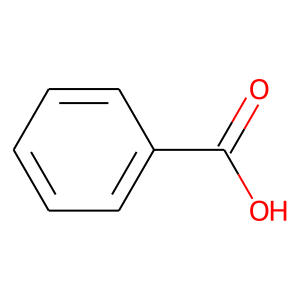

In [85]:
template_ligand = Chem.MolFromSmiles("O=C(O)c1ccccc1")
template_ligand

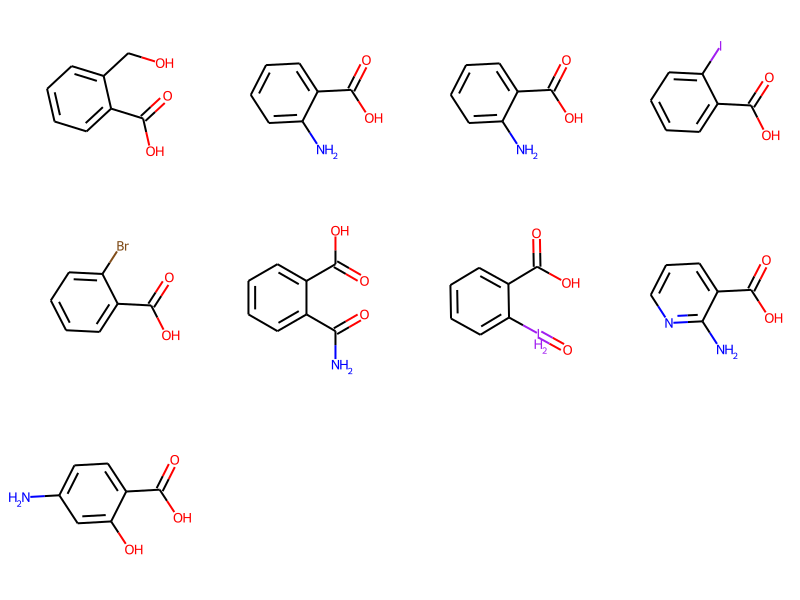

In [71]:
ligands = [Chem.MolFromSmiles("O=C(O)c1ccccc1CO"), 
           Chem.MolFromSmiles("Nc1ccccc1C(=O)O"), 
           Chem.MolFromSmiles("Nc1ccccc1C(=O)O"),
           Chem.MolFromSmiles("O=C(O)c1ccccc1I"),
           Chem.MolFromSmiles("O=C(O)c1ccccc1Br"),
           Chem.MolFromSmiles("NC(=O)c1ccccc1C(=O)O"),
           Chem.MolFromSmiles("O=[IH2]c1ccccc1C(=O)O"),
           Chem.MolFromSmiles("Nc1ncccc1C(=O)O"),
           Chem.MolFromSmiles("Nc1ccc(C(=O)O)c(O)c1")]
Draw.MolsToGridImage(ligands,molsPerRow=4,subImgSize=(200,200)) 


REMEMBER: If your linker is atom C7, we will only obtain molecules that have an R-group bound to that atom.
Also, we can select more than one linker atom:
In a notebook --> linker = ["C7", "C4"]
Running on the cluster --> -a C7 C8 


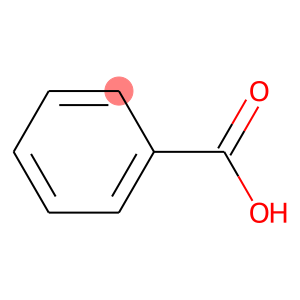

In [97]:
linker = ['C7']
template_ligand.__sssAtoms = [8] # Highlight the atom C7
print('REMEMBER: If your linker is atom C7, we will only obtain molecules that have an R-group bound to that atom.')
print('Also, we can select more than one linker atom:')
print('In a notebook --> linker = ["C7", "C4"]')
print('Running on the cluster --> -a C7 C8 ')
template_ligand

In [77]:
template_ligand_path = "./template_ligand.pdb"
ligands_path = "./ligands.sdf"

In [78]:
filter_mols(template_ligand_path, ligands_path,'test',linker)
# Results are stored in the file test.sdf 

Filtering passed for molecule 
Filtering passed for molecule 
Filtering passed for molecule 
Filtering passed for molecule 
Filtering passed for molecule 
Filtering passed for molecule 
Filtering passed for molecule 
No substructure match for ligand , skipping
Molecule  did not meet the R-groups requirements.


In [90]:
### This block of code is only for visualization purposes.
suppl = Chem.SDMolSupplier('test.sdf')   
mols = []
for mol in suppl:
    AllChem.Compute2DCoords(mol)
    mols.append(mol)

### Filtering Results


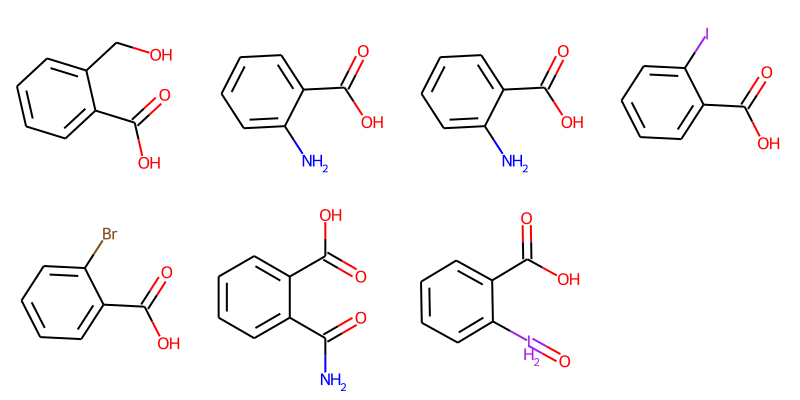

In [94]:
Draw.MolsToGridImage(mols,molsPerRow=4,subImgSize=(200,200)) 

## Running in the Cluster

```sh
#!/bin/bash
#SBATCH -J filter
#SBATCH --output=filter.out
#SBATCH --error=filter.err
#SBATCH --ntasks=3
#SBATCH --mem-per-cpu=10000

source /shared/home/hmartin/miniconda3/etc/profile.d/conda.sh
conda activate /shared/home/hmartin/miniconda3/envs/r_groups_env

python -m database_filtering.run_filtering -i template_ligand.pdb -l ligands.sdf -a C7 -o test
```